In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LogNorm
import matplotlib as mpl
mpl.style.use('./paper.mplstyle')

# Model result load-in

In [38]:
df_xgb = pd.read_csv("data/model_results.csv")
df_xgb.head()

,Unnamed: 0,actual_dele,pred_dele,error_e,actual_delsini,pred_delsini,error_sini,Des'n,e,Incl.,prope_h,propsini_h,pred_e,pred_sini,propa,prope,propsini
0,0,0.051333,0.047883,0.000732,-0.002584,-0.003377,0.000312,K08GG6Z,0.136337,18.15952,0.143651,0.320243,0.184220,0.308286,3.096944,0.187670,0.309080
1,1,-0.040941,-0.036978,0.001724,-0.011308,-0.011169,0.000243,a3916,0.205167,8.93215,0.226707,0.143824,0.168189,0.144096,2.744571,0.164226,0.143957
2,2,0.024274,0.024890,0.002030,-0.024976,-0.025101,0.000447,K19UE7F,0.218364,14.86524,0.232739,0.241083,0.243254,0.231446,2.629108,0.242638,0.231570
3,3,0.020923,0.017154,0.002157,0.007004,0.006788,0.000303,w9553,0.165092,5.29658,0.151933,0.101674,0.182246,0.099099,2.697252,0.186015,0.099315
4,4,0.020628,0.005080,0.001133,-0.019296,-0.018888,0.000508,c3003,0.038543,17.30181,0.070188,0.284629,0.043622,0.278517,3.190367,0.059171,0.278109


In [39]:
nesvorny_elements = pd.read_csv("data/nesvorny_catalog_dataset.csv")
df_xgb = pd.merge(df_xgb, nesvorny_elements[["Des'n", 'da', 'de', 'dsini']], on="Des'n", how="inner")

/tmp/ipykernel_28962/3766612022.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  nesvorny_elements = pd.read_csv("data/nesvorny_catalog_dataset.csv")


In [40]:
# Proper elements after xgboost Model prediction
pred_e = df_xgb["pred_e"]
pred_sini = df_xgb["pred_sini"]

# Proper elements after integration
prope = df_xgb["prope"]
propsini = df_xgb["propsini"]

# Proper elements after Linear prediction
linear_e = df_xgb["prope_h"]
linear_sini = df_xgb["propsini_h"]

# Osculating elements
e = df_xgb["e"]
sini = np.sin(df_xgb["Incl."] * np.pi/180)

# mad calculation

In [41]:
# mad calculations
mad_nesvorny_vs_osculating_e = np.sqrt(np.median((prope - e)**2))
mad_nesvorny_vs_osculating_sini = np.sqrt(np.median((propsini - sini)**2))

mad_nesvorny_vs_linear_e = np.sqrt(np.median((prope - linear_e)**2))
mad_nesvorny_vs_linear_sini = np.sqrt(np.median((propsini - linear_sini)**2))

mad_nesvorny_vs_xgboost_e = np.sqrt(np.median((prope - pred_e)**2))
mad_nesvorny_vs_xgboost_sini = np.sqrt(np.median((propsini - pred_sini)**2))

# mad improvement calculations
improvement_xgboost_vs_linear_e = ((mad_nesvorny_vs_linear_e - mad_nesvorny_vs_xgboost_e) / mad_nesvorny_vs_linear_e) * 100
improvement_xgboost_vs_linear_sini = ((mad_nesvorny_vs_linear_sini - mad_nesvorny_vs_xgboost_sini) / mad_nesvorny_vs_linear_sini) * 100

improvement_xgboost_vs_osculating_e = ((mad_nesvorny_vs_osculating_e - mad_nesvorny_vs_xgboost_e) / mad_nesvorny_vs_osculating_e) * 100
improvement_xgboost_vs_osculating_sini = ((mad_nesvorny_vs_osculating_sini - mad_nesvorny_vs_xgboost_sini) / mad_nesvorny_vs_osculating_sini) * 100

# Results dictionary
results = {
    'mad_nesvorny_vs_osculating_e': mad_nesvorny_vs_osculating_e,
    'mad_nesvorny_vs_osculating_sini': mad_nesvorny_vs_osculating_sini,
    'mad_nesvorny_vs_linear_e': mad_nesvorny_vs_linear_e,
    'mad_nesvorny_vs_linear_sini': mad_nesvorny_vs_linear_sini,
    'mad_nesvorny_vs_xgboost_e': mad_nesvorny_vs_xgboost_e,
    'mad_nesvorny_vs_xgboost_sini': mad_nesvorny_vs_xgboost_sini,
    'improvement_xgboost_vs_linear_e_percent': improvement_xgboost_vs_linear_e,
    'improvement_xgboost_vs_linear_sini_percent': improvement_xgboost_vs_linear_sini,
    'improvement_xgboost_vs_osculating_e_percent': improvement_xgboost_vs_osculating_e,
    'improvement_xgboost_vs_osculating_sini_percent': improvement_xgboost_vs_osculating_sini
}

results

{'mad_nesvorny_vs_osculating_e': np.float64(0.026987200000000003),
 'mad_nesvorny_vs_osculating_sini': np.float64(0.012245453247580654),
 'mad_nesvorny_vs_linear_e': np.float64(0.02706150967298132),
 'mad_nesvorny_vs_linear_sini': np.float64(0.004145326637503801),
 'mad_nesvorny_vs_xgboost_e': np.float64(0.002598665725706495),
 'mad_nesvorny_vs_xgboost_sini': np.float64(0.0006164884067992871),
 'improvement_xgboost_vs_linear_e_percent': np.float64(90.39718863762782),
 'improvement_xgboost_vs_linear_sini_percent': np.float64(85.12811026224657),
 'improvement_xgboost_vs_osculating_e_percent': np.float64(90.3707471478831),
 'improvement_xgboost_vs_osculating_sini_percent': np.float64(94.96557298178337)}

# Plot Generation

## Comparison between Osculating, Linear Prediction, and Model Prediction

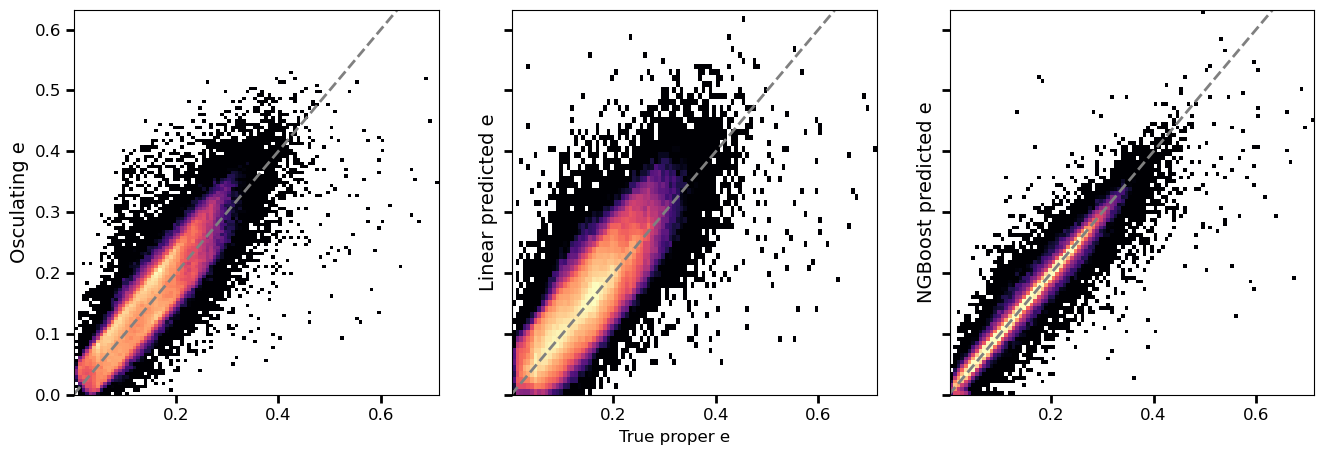

<Figure size 600x600 with 0 Axes>

In [52]:
df_combined = pd.DataFrame({
	'propa': df_xgb['propa'],
	'e': df_xgb['e'], 
	'true_e': df_xgb['prope'],
	'linear_e': df_xgb['prope_h'],
	'ngb_e': df_xgb['pred_e'],
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
bins = 100
vmin = 10
cmap = mpl.cm.magma
norm = LogNorm(vmin=vmin)

data = [
	(df_combined['true_e'], df_combined['e'], "Osculating"),
	(df_combined['true_e'], df_combined['linear_e'], "Linear"),
	(df_combined['true_e'], df_combined['ngb_e'], "NGB model"),
]

for i, (x, y, label) in enumerate(data):
	ax = axs[i]
	x = x[(x <= 1) & (y <= 1)]
	y = y[(x <= 1) & (y <= 1)]
	h = ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)

	minval = min(x.min(), y.min())
	maxval = max(x.max(), y.max())
	ax.plot([minval, maxval], [minval, maxval], ls = 'dashed', linewidth=2, color = "grey", rasterized = True)
	
	if i == 0:
		ax.set_ylabel("Osculating e", fontsize=14)
	elif i == 1:
		ax.set_ylabel("Linear predicted e", fontsize=14)
	else:
		ax.set_ylabel("NGBoost predicted e", fontsize=14)

	ax.tick_params(axis='both', labelsize=12)
	h_vals, xedges, yedges = np.histogram2d(x, y, bins=bins)
	X, Y = np.meshgrid((xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2)

fig.supxlabel("True proper e")
plt.show()
plt.savefig("./plots/comparisons_e.pdf")

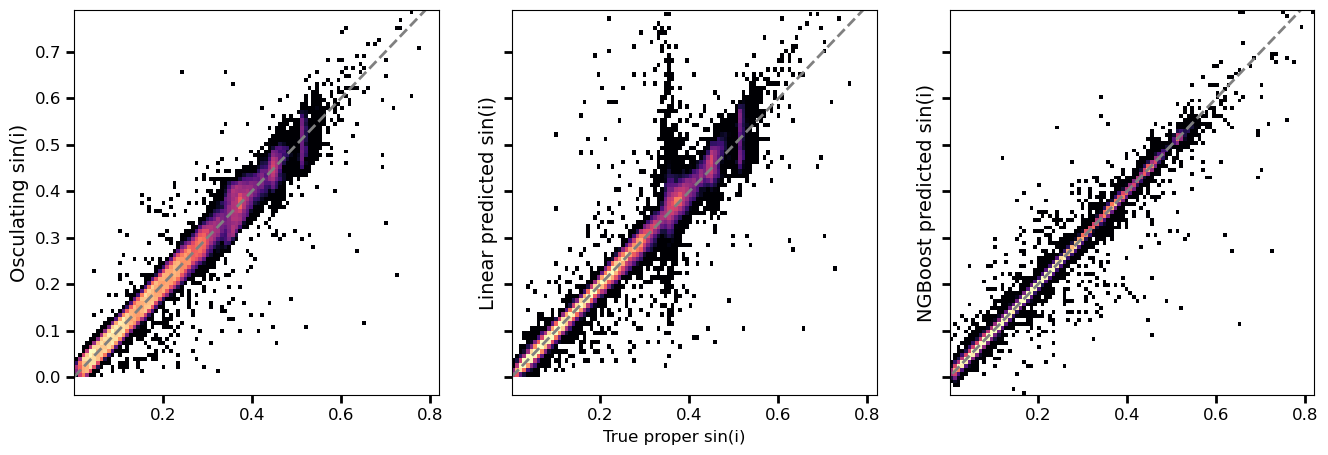

<Figure size 600x600 with 0 Axes>

In [53]:
df_combined = pd.DataFrame({
	'propa': df_xgb['propa'],
	'sini': np.sin(df_xgb['Incl.'] * np.pi/180), 
	'true_sini': df_xgb['propsini'],
	'linear_sini': df_xgb['propsini_h'],
	'ngb_sini': df_xgb['pred_sini']
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
bins = 100
vmin = 10
cmap = mpl.cm.magma
norm = LogNorm(vmin=vmin)

data = [
	(df_combined['true_sini'], df_combined['sini'], "Osculating"),
	(df_combined['true_sini'], df_combined['linear_sini'], "Linear"),
	(df_combined['true_sini'], df_combined['ngb_sini'], "NGB model"),
]

for i, (x, y, label) in enumerate(data):
	ax = axs[i]
	x = x[(x <= 1) & (y <= 1)]
	y = y[(x <= 1) & (y <= 1)]
	h = ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)

	minval = min(x.min(), y.min())
	maxval = max(x.max(), y.max())
	ax.plot([minval, maxval], [minval, maxval], ls = 'dashed', linewidth=2, color = "grey", rasterized = True)
	
	if i == 0:
		ax.set_ylabel("Osculating sin(i)", fontsize=14)
	elif i == 1:
		ax.set_ylabel("Linear predicted sin(i)", fontsize=14)
	else:
		ax.set_ylabel("NGBoost predicted sin(i)", fontsize=14)

	ax.tick_params(axis='both', labelsize=12)
	h_vals, xedges, yedges = np.histogram2d(x, y, bins=bins)
	X, Y = np.meshgrid((xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2)

fig.supxlabel("True proper sin(i)")
plt.show()
plt.savefig("./plots/comparisons_sini.pdf")

## Nesvorny proper elements sampling

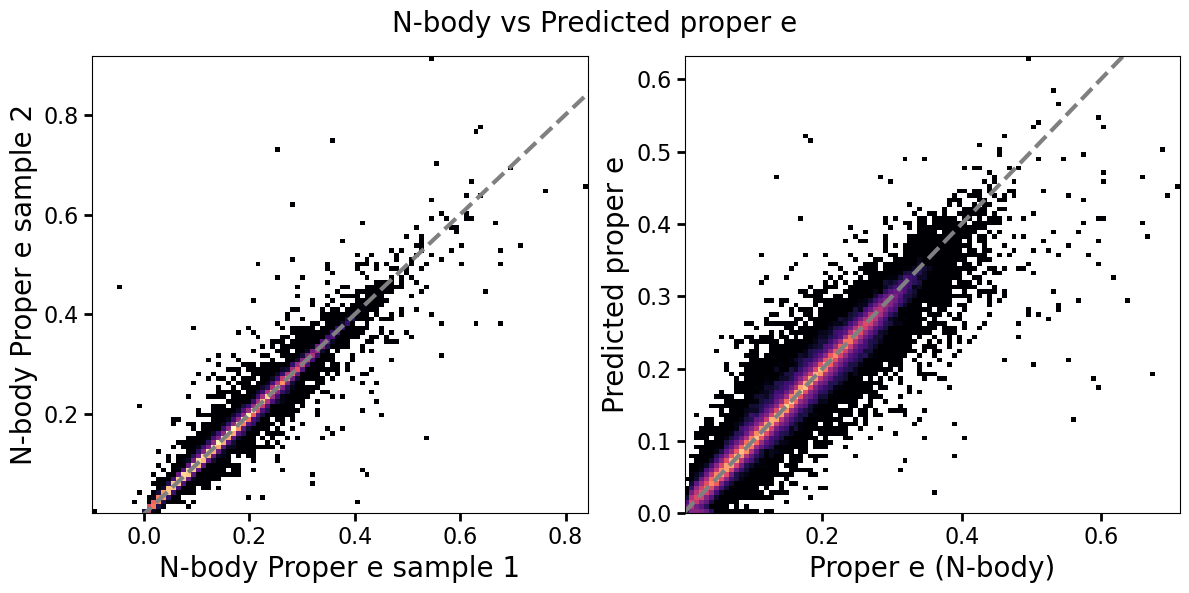

<Figure size 600x600 with 0 Axes>

In [ ]:
bins = 100
vmin = 10
cmap = plt.cm.magma
norm = LogNorm(vmin=vmin)

np.random.seed(42)

x1_e = np.random.normal(df_xgb["prope"].values, df_xgb["de"].values)
y1_e = np.random.normal(df_xgb["prope"].values, df_xgb["de"].values)

x2_e = df_xgb["prope"].values
y2_e = df_xgb["pred_e"].values

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)

ax = axs[0]
mask = (x1_e <= 1) & (y1_e <= 1)
x, y = x1_e[mask], y1_e[mask]
ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)
minval, maxval = min(x.min(), y.min()), max(x.max(), y.max())
ax.plot([minval, maxval], [minval, maxval], ls='dashed', color='grey', rasterized = True)
ax.set_xlabel("N-body Proper e sample 1")
ax.set_ylabel("N-body Proper e sample 2")
ax.tick_params(axis='both')

ax = axs[1]
mask = (x2_e <= 1) & (y2_e <= 1)
x, y = x2_e[mask], y2_e[mask]
ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)
minval, maxval = min(x.min(), y.min()), max(x.max(), y.max())
ax.plot([minval, maxval], [minval, maxval], ls='dashed', color='grey', rasterized = True)
ax.set_xlabel("Proper e (N-body)")
ax.set_ylabel("Predicted proper e")
ax.tick_params(axis='both')

plt.suptitle("N-body vs Predicted proper e", fontsize = 20)
plt.tight_layout()
plt.show()
plt.savefig("./plots/prope_double_sampling.pdf")

In [45]:
mad_nesvorny_sample_e = np.sqrt(np.median((x1_e - y1_e)**2))
results = {
    'mad_nesvorny_sample_e': mad_nesvorny_sample_e,
    'mad_nesvorny_vs_ml_e': mad_nesvorny_vs_xgboost_e
}

results

{'mad_nesvorny_sample_e': np.float64(0.00010128497729436359),
 'mad_nesvorny_vs_ml_e': np.float64(0.002598665725706495)}

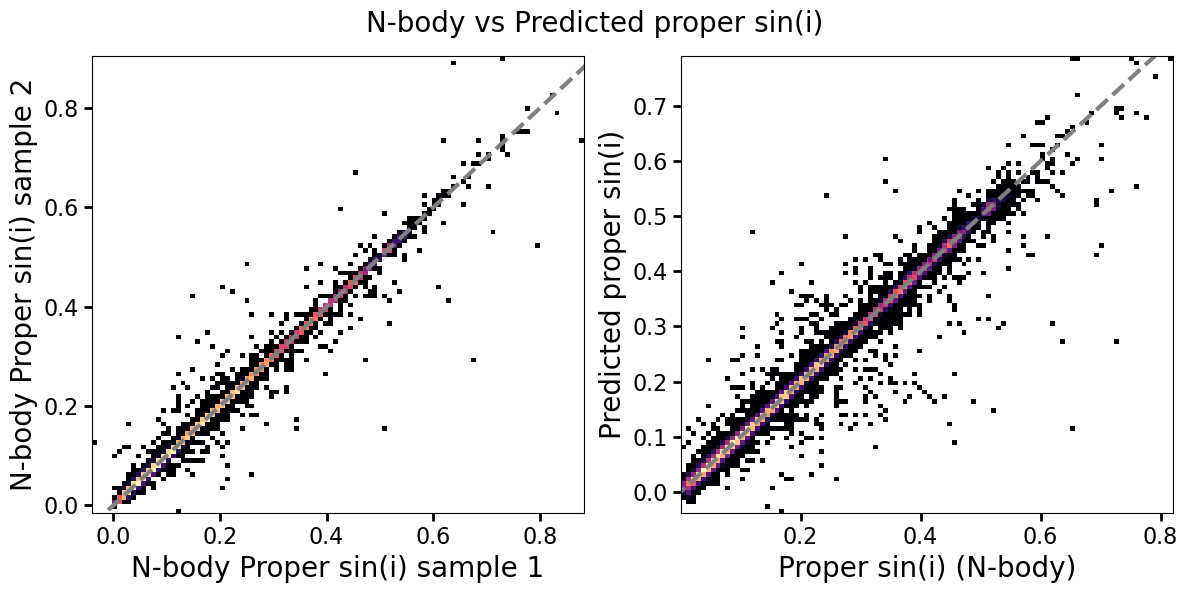

<Figure size 600x600 with 0 Axes>

In [55]:
bins = 100
vmin = 10
cmap = plt.cm.magma
norm = LogNorm(vmin=vmin)

np.random.seed(42)

x1_sini = np.random.normal(df_xgb["propsini"].values, df_xgb["dsini"].values)
y1_sini = np.random.normal(df_xgb["propsini"].values, df_xgb["dsini"].values)

x2_sini = df_xgb["propsini"].values
y2_sini = df_xgb["pred_sini"].values

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)

ax = axs[0]
mask = (x1_sini <= 1) & (y1_sini <= 1)
x, y = x1_sini[mask], y1_sini[mask]
ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)
minval, maxval = min(x.min(), y.min()), max(x.max(), y.max())
ax.plot([minval, maxval], [minval, maxval], ls='dashed', color='grey', rasterized = True)
ax.set_xlabel("N-body Proper sin(i) sample 1")
ax.set_ylabel("N-body Proper sin(i) sample 2")
ax.tick_params(axis='both')

ax = axs[1]
mask = (x2_sini <= 1) & (y2_sini <= 1)
x, y = x2_sini[mask], y2_sini[mask]
ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)
minval, maxval = min(x.min(), y.min()), max(x.max(), y.max())
ax.plot([minval, maxval], [minval, maxval], ls='dashed', color='grey')
ax.set_xlabel("Proper sin(i) (N-body)")
ax.set_ylabel("Predicted proper sin(i)")
ax.tick_params(axis='both')

plt.suptitle("N-body vs Predicted proper sin(i)", fontsize = 20)
plt.tight_layout()
plt.show()
plt.savefig("./plots/propsini_double_sampling.pdf")

In [47]:
mad_nesvorny_sample_sini = np.sqrt(np.median((x1_sini - y1_sini)**2))
results = {
    'mad_nesvorny_sample_sini': mad_nesvorny_sample_sini,
    'mad_nesvorny_vs_ml_sini': mad_nesvorny_vs_xgboost_sini
}

results

{'mad_nesvorny_sample_sini': np.float64(4.596099149912353e-05),
 'mad_nesvorny_vs_ml_sini': np.float64(0.0006164884067992871)}

## Nesvorny Plots replicate

In [48]:
# Define sample with high errors

def calculate_d(a_p, delta_a_p, delta_e_p, delta_sin_i_p):
	numerator = 3e4  # 3 × 10^4 m/s
	denominator = math.sqrt(a_p)
	term1 = (delta_a_p / a_p) ** 2
	term2 = 2 * (delta_e_p ** 2)
	term3 = 2 * (delta_sin_i_p ** 2)
	inside_sqrt = (5 / 4) * term1 + term2 + term3
	d = (numerator / denominator) * math.sqrt(inside_sqrt)
	return d

df_xgb['d'] = df_xgb.apply(lambda row: calculate_d(row['propa'], row['da'], row['de'], row['dsini']), axis = 1)
df_xgb_high = df_xgb[df_xgb['d'] > 100]

In [49]:
# MMR a values
a_jupiter = 5.204
a_mars = 1.524

resonances = {
	"3:1": ("Jupiter", 3, 1),
	"12:5": ("Jupiter", 12, 5),
	"13:5": ("Jupiter", 13, 5),
	"9:4": ("Jupiter", 9, 4),
	"11:5": ("Jupiter", 11, 5),
	"2:1": ("Jupiter", 2, 1),
	"1:2": ("Mars", 1, 2),
	"7:2": ("Jupiter", 7, 2),
	"4:7": ("Mars", 4, 7)
}

# Function to calculate semi-major axis for a resonance
def compute_resonance_axis(p, q, a_primary):
	return a_primary * (q / p) ** (2/3)

# Store results
a_values = {}
for label, (planet, p, q) in resonances.items():
	if planet == "Jupiter":
		a = compute_resonance_axis(p, q, a_jupiter)
		a_values[label] = a
	else:
		a = compute_resonance_axis(p, q, a_mars)
		a_values[label] = a
a_values["5:2:2"] = 3.17
print(a_values)

{'3:1': 2.501822254626584, '12:5': 2.903107560189675, '13:5': 2.752253224713012, '9:4': 3.030741825658466, '11:5': 3.076489949733917, '2:1': 3.27831457182646, '1:2': 2.4191992031995357, '7:2': 2.257487001377278, '4:7': 2.2131473644877713, '5:2:2': 3.17}


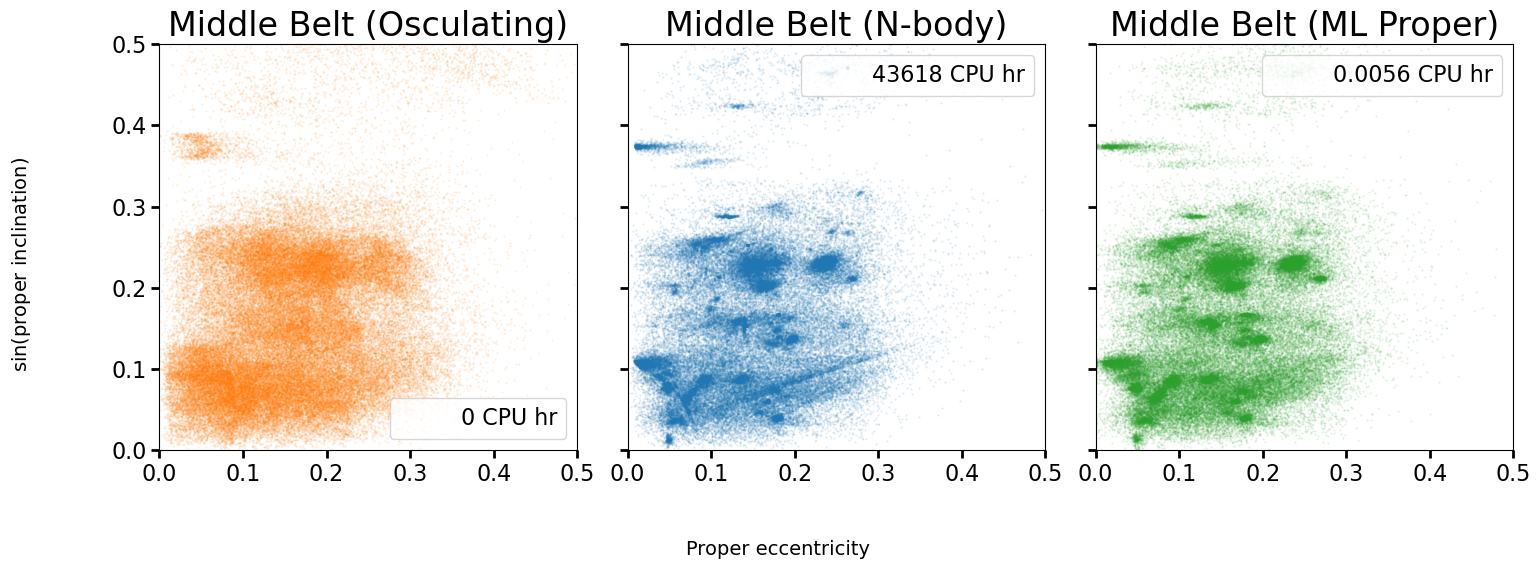

<Figure size 600x600 with 0 Axes>

In [56]:
# Need to improve the color blindness accessibility
middle_belt = df_xgb[(df_xgb["propa"] > 2.5) & (df_xgb["propa"] < 2.825)]

cpu_hours = {
    "Osculating": "0 CPU hr",
    "N-body": "43618 CPU hr",
    "ML Proper": "0.0056 CPU hr"
}

fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

ax[0].scatter(
    middle_belt["e"], np.sin(middle_belt["Incl."] * np.pi / 180),
    s=0.5, alpha=0.1, color="C1", rasterized=True, label=cpu_hours["Osculating"]
)
ax[0].set_title("Middle Belt (Osculating)")
ax[0].legend()

ax[1].scatter(
    middle_belt["prope"], middle_belt["propsini"],
    s=0.5, alpha=0.1, color="C0", rasterized=True, label=cpu_hours["N-body"]
)
ax[1].set_title("Middle Belt (N-body)")
ax[1].legend()

ax[2].scatter(
    middle_belt["pred_e"], middle_belt["pred_sini"],
    s=0.5, alpha=0.1, color="C2", rasterized=True, label=cpu_hours["ML Proper"]
)
ax[2].set_title("Middle Belt (ML Proper)")
ax[2].legend()

for axis in ax:
    axis.set_xlim(0, 0.5)
    axis.set_ylim(0, 0.5)

fig.supxlabel("Proper eccentricity", fontsize=14)
fig.supylabel(r"$\sin(\mathrm{proper\ inclination})$", fontsize=14)

plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.95])
plt.show()
plt.savefig("./plots/comparison_in_diff_regions.pdf")

In [51]:
len(middle_belt)

87236